## Predicing Housing Prices Using Linear Regression


In our last exercises, we learned about Python, Matrices, Vectors, handing and plotting data. In this tutorial, we will use all that information and create a mathematical model to predict housing prices using Linear regression. 


#### What is Linear Regression

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable.

<img src="1.PNG" align="center"/>

**Least Squares Methods**

<img src="2.PNG" align="center"/>

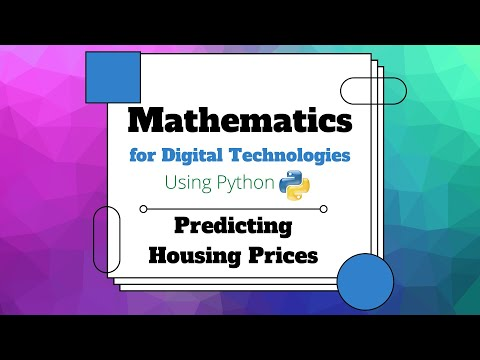

In [42]:
from IPython.display import YouTubeVideo
YouTubeVideo('OxMNNjp-mDw', width=860, height=460)

### Predicting Housing prices using Linear Regression

We will take the Housing dataset which contains information about different houses in Boston. We can access this data from the scikit-learn library. There are 506 samples and 13 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features.

So let’s get started.

In [9]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [34]:
print(boston_dataset.keys()) 

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [35]:
print (boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [36]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [37]:
#- Median value of owner-occupied homes in $1000's
boston['MEDV'] = boston_dataset.target

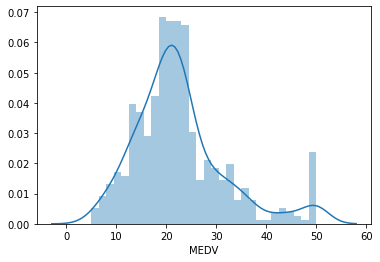

In [38]:
sns.distplot(boston['MEDV'], bins=30)
plt.show()

We will use the following features to train our Model.

**RM:** It's an average number of rooms, so I would expect this to never be less than 1, while the maximum number of rooms could be quite high. Given the maximum price of $50,000, I would expect it to be either 1.385 or 5.609.

**CRIM:** Per capita crime rate by town

In machine learning, the variable that is being modeled is called the target variable; it's what you are trying to predict given the features. For this dataset, the suggested target is MEDV, the median house value in 1,000s of dollar

In [29]:
X = pd.DataFrame(np.c_[boston['CRIM'], boston['RM']], columns = ['CRIM','RM'])
Y = boston['MEDV']

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [40]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [41]:
Y_predict = lin_model.predict(X_test)
print (X_test.shape)
print (Y_predict)

(102, 2)
[37.85924522 26.47537196 24.73694167  9.13492368 35.06374552  7.96247195
 29.28680728 27.13489687 27.14858725 23.85161265 32.86902452 21.21514466
 21.02160144 31.40662072 25.70252461 20.50440186  4.57739853 16.05289557
 16.2980176   4.15366826 13.90289449 24.20865536 39.72028661 24.34608888
 30.21462671 16.3537287  24.36281885 22.74836288 23.91293672 26.04698696
 20.13582109 16.52515753 16.45663212 30.24705417 25.3587466  23.6544588
 26.3393298  15.78568754 40.73469088 29.68593624 20.35293914 12.87702905
 26.20540813 19.76852529 25.8102591  28.43634107 -4.32772916 21.00830719
 21.85452396 22.68464843 22.3492963  21.95814178 23.65535277 21.65574055
 18.34331955 24.46777878 36.15634412 24.21620169 26.83868215 21.02586858
 21.50688204 21.49574027 18.77553296 28.67185673 20.84005025  8.66806327
 25.1562488  23.02522898 20.98873098 19.1404498  23.84675489 22.11234233
 18.045904   23.99719205 14.60299559 27.27942232 19.97598432 17.25682778
 31.9187505  19.31233818 22.01728426 40.250

Scatter plots of Actual vs Predicted are one of the richest form of data visualization. You can tell pretty much everything from it. Ideally, all your points should be close to a regressed diagonal line. 

Text(0.5, 1.0, 'Actual Prices vs Predicted prices')

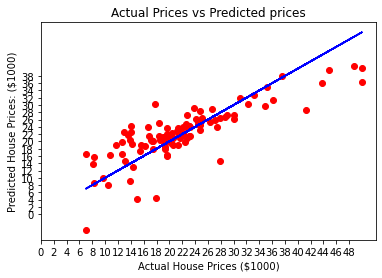

In [33]:
plt.scatter(Y_test, Y_predict , c = 'red')

# 100 percent accuracy line

plt.plot(Y_test, Y_test, c = 'blue')
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted House Prices: ($1000)")
plt.xticks(range(0, int(max(Y_test)),2))
plt.yticks(range(0, int(max(Y_predict)),2))
plt.title("Actual Prices vs Predicted prices")